<a href="https://colab.research.google.com/github/jedisam/E-COV/blob/main/HandWrittenDigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

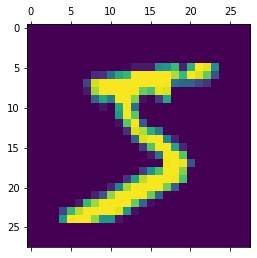

In [ ]:
plt.matshow(x_train[0])

In [ ]:
x_train_flatten = x_train.reshape(len(x_train), 784)
x_test_flatten = x_test.reshape(len(x_test), 784)

In [ ]:
y_train[0]

5

In [ ]:
x_train_flatten[0].shape

(784,)

In [ ]:
from tensorflow.keras import Sequential # import Sequential from tensorflow.keras
from tensorflow.keras.layers import Dense # import Dense from tensorflow.keras.layers
from numpy.random import seed # seed helps you to fix the randomness in the neural network.
import tensorflow

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train_flatten[0].shape)))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

In [ ]:
# import Adam optimizer
from tensorflow.keras.optimizers import Adam
optimizer = Adam(0.0001) # 0.001 is the learning rate

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer, metrics=['accuracy']) # compile the model


In [ ]:
seed_value = 42
seed(seed_value) # If you build the model with given parameters, set_random_seed will help you produce the same result on multiple execution


# Recommended by Keras -------------------------------------------------------------------------------------
# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# Recommended by Keras -------------------------------------------------------------------------------------


# 4. Set the `tensorflow` pseudo-random generator at a fixed value
tensorflow.random.set_seed(seed_value)
history = model.fit(x_train_flatten, y_train, epochs=300, validation_split=0.2,  batch_size=200, verbose = 1) # fit the model

Epoch 1/300
240/240 [==============================] - 5s 17ms/step - loss: 5.6679 - accuracy: 0.7088 - val_loss: 1.2516 - val_accuracy: 0.8313
Epoch 2/300
240/240 [==============================] - 4s 17ms/step - loss: 0.9375 - accuracy: 0.8496 - val_loss: 0.7324 - val_accuracy: 0.8612
Epoch 3/300
240/240 [==============================] - 4s 17ms/step - loss: 0.5383 - accuracy: 0.8901 - val_loss: 0.5783 - val_accuracy: 0.8862
Epoch 4/300
240/240 [==============================] - 4s 17ms/step - loss: 0.3698 - accuracy: 0.9164 - val_loss: 0.4917 - val_accuracy: 0.9032
Epoch 5/300
240/240 [==============================] - 4s 17ms/step - loss: 0.2659 - accuracy: 0.9358 - val_loss: 0.4602 - val_accuracy: 0.9112
Epoch 6/300
240/240 [==============================] - 4s 17ms/step - loss: 0.1962 - accuracy: 0.9495 - val_loss: 0.4303 - val_accuracy: 0.9166
Epoch 7/300
240/240 [==============================] - 4s 17ms/step - loss: 0.1464 - accuracy: 0.9604 - val_loss: 0.4207 - val_accuracy:

In [ ]:
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1764 - accuracy: 0.9759


[0.17640407383441925, 0.9758999943733215]

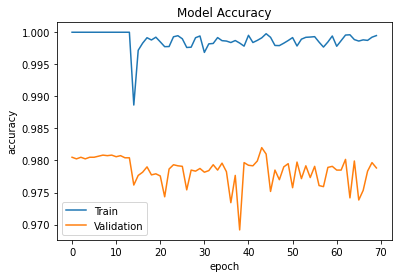

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
y_predicted = model.predict(x_test_flatten)

In [ ]:
y_predicted[0]

array([0.0000000e+00, 1.6052579e-25, 0.0000000e+00, 4.0896324e-37,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

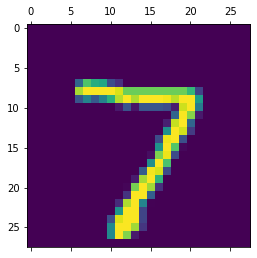

In [ ]:
plt.matshow(x_test[0])

In [ ]:
y_test[0]

7

In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
y_predicted_label = [np.argmax(i) for i in y_predicted]

In [ ]:
y_predicted_label[:20]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 0, 9, 0, 1, 5, 9, 7, 3, 4]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    1,    1,    0,    1,    1,    0,    2,    0],
       [   0, 1129,    3,    1,    0,    0,    1,    0,    1,    0],
       [   4,    0, 1016,    0,    0,    0,    1,    4,    5,    2],
       [   1,    1,    1,  993,    0,    5,    0,    2,    7,    0],
       [   3,    1,    6,    0,  964,    1,    2,    0,    1,    4],
       [  70,    0,    0,    9,    0,  807,    3,    0,    3,    0],
       [ 877,    2,    2,    1,    3,   22,   50,    0,    1,    0],
       [   1,    1,    5,    4,    0,    0,    0, 1011,    4,    2],
       [   1,    1,    2,    3,    1,    4,    2,    4,  951,    5],
       [   0,    3,    0,    7,   11,    2,    0,    9,    4,  973]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

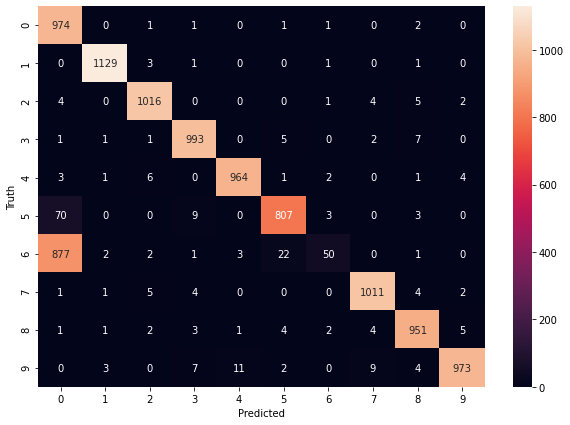

In [ ]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')